## Import Packages

In [17]:
import pandas as pd

In [18]:
from textblob import TextBlob

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# to match style with the Udemy videos
sns.set()
import matplotlib
matplotlib.rcParams["patch.force_edgecolor"] = True

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image

## Define Classes & Functions

In [22]:
class Album(object):
    name = ''
    tracks = pd.DataFrame()
    info = pd.DataFrame()

In [23]:
def sentiment_column_tracks(df):
    for index, row in df.iterrows():
        lyrics = str(row['lyrics'])
        analysis = TextBlob(lyrics)
        df.loc[index,'num_words'] = len(lyrics.split())
        df.loc[index,'polarity'] = analysis.sentiment.polarity
        df.loc[index,'subjectivity'] = analysis.sentiment.subjectivity
    return df

In [24]:
def sentiment_column_album_plus_lyrics(info_df,track_df):
    lyrics = []
    for index, row in track_df.iterrows():
        lyrics.append(str(row['lyrics'])) 
    lyrics = ' '.join(lyrics)
    analysis = TextBlob(lyrics)
    info_df['num_words'] = len(lyrics.split())
    info_df['polarity'] = analysis.sentiment.polarity
    info_df['subjectivity'] = analysis.sentiment.subjectivity
    return info_df, lyrics

In [25]:
def build_album(filename=''):
    album = Album()
    album.tracks = pd.read_excel(filename)
    album.tracks = sentiment_column_tracks(album.tracks)
    album.info = pd.read_excel(filename,sheet_name=1)
    album.info, album.lyrics = sentiment_column_album_plus_lyrics(album.info,album.tracks)
    album.name = album.info.loc[0,'album_name']
    return album

In [26]:
def merge_albums(albums=[]):
    all_albums = albums[0]
    for index, album in enumerate(albums[1:]):
        all_albums = pd.merge(all_albums,album,how='outer')
    return all_albums

## Build Objects

In [27]:
worlds = build_album('worlds-album-info.xlsx')

In [28]:
all_tracks = merge_albums([worlds.tracks])
all_tracks = all_tracks.reset_index().drop('track',axis=1).rename(columns={'index':'track'})
all_tracks['track'] += 1
#all_tracks

In [29]:
all_lyrics = [worlds.lyrics]
all_lyrics = ' '.join(all_lyrics)

In [30]:
all_albums = merge_albums([worlds.info])
#all_albums

In [31]:
#fig, ax = plt.subplots(1,14,sharex='col',sharey='row')

## Present Findings

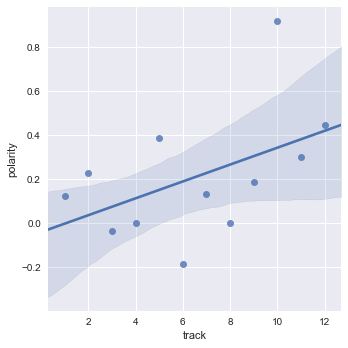

In [32]:
sns.lmplot(x='track',y='polarity',data=worlds.tracks)#,size=3,aspect=4

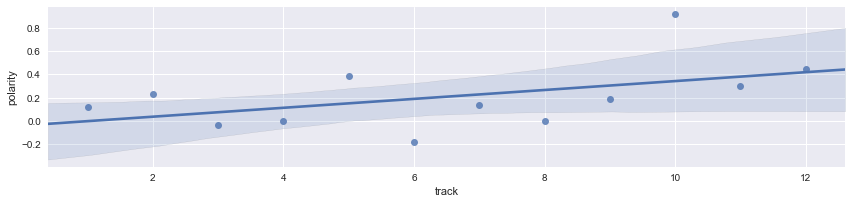

In [33]:
sns.lmplot(x='track',y='polarity',data=all_tracks.reset_index(),size=3,aspect=4)

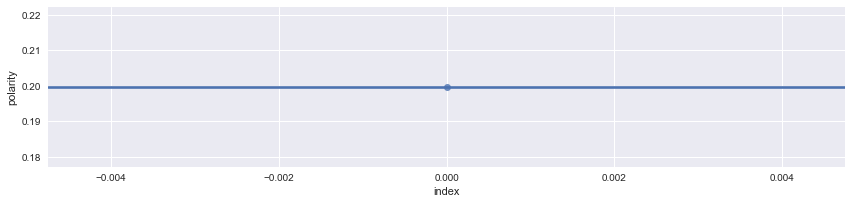

In [34]:
sns.lmplot(x='index',y='polarity',data=all_albums.reset_index(),size=3,aspect=4)